# Your info

Full name: mohammad ali farahat

Student ID: 97521423

Notice: **You can add new cells for each part.**

# Q1.A. Kohonen

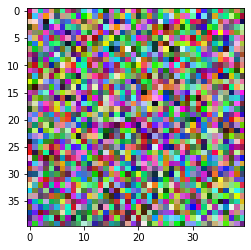

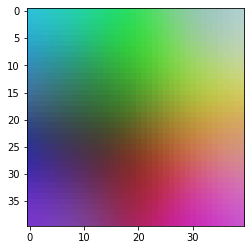

In [162]:
#write your code here

import numpy as np
import matplotlib.pyplot as plt


# adjust inputs here :
neurons = 1600
size = int(np.sqrt(neurons))
learning_rate = 0.1
sigma = 5
epochs = 100

########################################################
def find_dists(a, index):
    i,j = np.indices(a.shape, sparse=True)
    return (i-index[0])**2 + (j-index[1])**2

def convert_reshape(a):
    a0 = (int) (a/size)
    a1 = a % size
    return a0, a1

# initialize random input and weights
weights = np.random.rand(neurons, 3) 
inputs = np.random.rand(neurons,3)

# show random input rgb data
plt.imshow(inputs.reshape(size, size,3))
plt.show()

for e in range(epochs):
    for x in range(neurons):
        # find best neuron 
        arg_bmu = np.argmin(np.sum(np.square(np.subtract(weights, inputs[x])), axis=1))
        
        # find dist vector from all neurons to bmu
        dist = find_dists(np.zeros((size,size)), tuple(convert_reshape(arg_bmu))).reshape(-1,1)

        # update weights
        weights += np.multiply(inputs[x] - weights, np.exp((-dist)/(2*(sigma)**2)))*learning_rate

# show results (by weights)
plt.imshow(weights.reshape(size,size,3))
plt.show()





# Q1.B. Kohonen

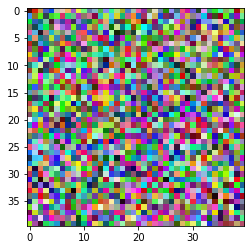

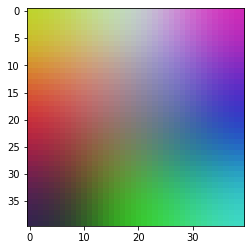

In [163]:
#write your code here

import numpy as np
import matplotlib.pyplot as plt


# adjust inputs here :
neurons = 1600
size = int(np.sqrt(neurons))
learning_rate = 1
sigma = 5
epochs = 100

########################################################
def find_dists(a, index):
    i,j = np.indices(a.shape, sparse=True)
    return (i-index[0])**2 + (j-index[1])**2

def convert_reshape(a):
    a0 = (int) (a/size)
    a1 = a % size
    return a0, a1

# initialize random input and weights
weights = np.random.rand(neurons, 3) 
inputs = np.random.rand(neurons,3)

# show random input rgb data
plt.imshow(inputs.reshape(size, size,3))
plt.show()

for e in range(epochs):
    for x in range(neurons):
        # find best neuron 
        arg_bmu = np.argmin(np.sum(np.square(np.subtract(weights, inputs[x])), axis=1))
        
        # find dist vector from all neurons to bmu
        dist = find_dists(np.zeros((size,size)), tuple(convert_reshape(arg_bmu))).reshape(-1,1)

        # update weights
        weights += np.multiply(inputs[x] - weights, np.exp((-dist)/(2*(sigma)**2)))*learning_rate

    learning_rate *= 0.95
# show results (by weights)
plt.imshow(weights.reshape(size,size,3))
plt.show()





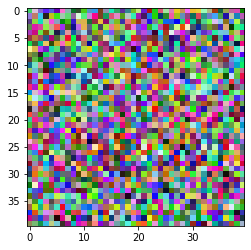

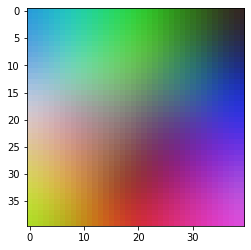

In [159]:
#write your code here

import numpy as np
import matplotlib.pyplot as plt


# adjust inputs here :
neurons = 1600
size = int(np.sqrt(neurons))
learning_rate = 1
sigma = 10
epochs = 100

########################################################
def find_dists(a, index):
    i,j = np.indices(a.shape, sparse=True)
    return (i-index[0])**2 + (j-index[1])**2

def convert_reshape(a):
    a0 = (int) (a/size)
    a1 = a % size
    return a0, a1

# initialize random input and weights
weights = np.random.rand(neurons, 3) 
inputs = np.random.rand(neurons,3)

# show random input rgb data
plt.imshow(inputs.reshape(size, size,3))
plt.show()

for e in range(epochs):
    for x in range(neurons):
        # find best neuron 
        arg_bmu = np.argmin(np.sum(np.square(np.subtract(weights, inputs[x])), axis=1))
        
        # find dist vector from all neurons to bmu
        dist = find_dists(np.zeros((size,size)), tuple(convert_reshape(arg_bmu))).reshape(-1,1)

        # update weights
        weights += np.multiply(inputs[x] - weights, np.exp((-dist)/(2*(sigma)**2)))*learning_rate

    learning_rate *= 0.95
    sigma *= 0.99
# show results (by weights)
plt.imshow(weights.reshape(size,size,3))
plt.show()





# Q2.A. MLP

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                60        
_________________________________________________________________
activation_2 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________
None


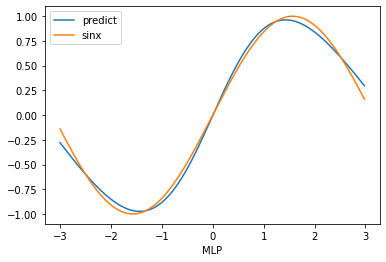

In [123]:
#write your code here

import keras
from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt


# create inputs for sin(x)
x = np.arange(-150, 150).reshape(-1,1) / 50
y = np.sin(x)

# create MLP
model = Sequential()

model.add(Dense(30, input_shape=(1,)))
model.add(Activation('sigmoid'))
model.add(Dense(20))
model.add(Activation('sigmoid'))
model.add(Dense(1))
print(model.summary())
model.compile(loss='mean_squared_error', optimizer='SGD')

# traing MLP for sin(x)
result = model.fit(x, y, epochs=1000, batch_size=4, verbose= 0)

# predict sin(x) that trained before
predictions = model.predict(x)

# plot prediction and sin(x) together 
plt.plot(x,predictions)
plt.plot(x,y)
plt.xlabel('MLP')
plt.legend(["predict", "sinx"])
plt.show()





# Q2.B. RBF

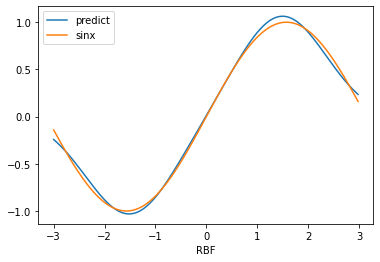

In [127]:
import numpy as np
import matplotlib.pyplot as plt


class RBF():
    def __init__(self, k=2, lr=0.01):
        self.k = k
        self.lr = lr

        self.w = np.random.randn(k)
        self.b = np.random.randn(1)


    def fit(self, X, y, epochs=1000):

        # find centers and derivations
        self.centers = np.random.choice(X, size=self.k)
        prev = self.centers.copy()
        self.deviations = np.zeros(self.k)
        tamam = False

        while not tamam:
            distances = np.abs(X[:, np.newaxis] - self.centers[np.newaxis, :])

            closestCluster = np.argmin(distances, axis=1)

            for i in range(self.k):
                pointsForCluster = X[closestCluster == i]
                if len(pointsForCluster) > 0:
                    self.centers[i] = np.average(pointsForCluster, axis=0) 

            tamam = np.linalg.norm(self.centers - prev) < 0.00001
            prev = self.centers.copy()

        distances = np.abs(X[:, np.newaxis] - self.centers[np.newaxis, :])
        closestCluster = np.argmin(distances, axis=1)

        for i in range(self.k):
            self.deviations[i] = np.std(X[closestCluster == i])

        # training
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                a = np.array([self.G(X[i], c, s) for c, s, in zip(self.centers, self.deviations)])
                F = a.T.dot(self.w) + self.b
        
                error = -(y[i] - F)
    
                # update weights
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error

    
    # Gaussian RBF
    def G(self, x, c, s): 
        return np.exp(-1 / (2 * s**2) * (x-c)**2)


    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            a = np.array([self.G(X[i], c, s) for c, s, in zip(self.centers, self.deviations)])
            F = a.T.dot(self.w) + self.b
            predictions.append(F)
        return predictions



X = np.arange(-150, 150) / 50
y = np.sin(X)

rbf = RBF(lr=0.01, k=2)
rbf.fit(X, y, epochs=1000)

predictions = rbf.predict(X)

plt.plot(X, predictions)
plt.plot(X, y)
plt.legend(["predict", "sinx"])
plt.xlabel('RBF')
plt.show()



# Q2.C. Compare

MLP training compeleted 
RBF training compeleted 


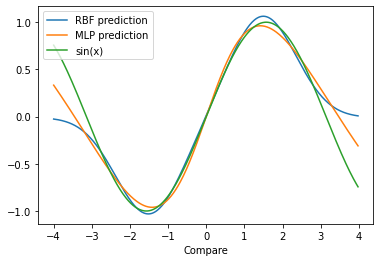

In [157]:
#write your code here


import keras
from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt


# create inputs for sin(x)
x = np.arange(-150, 150).reshape(-1,1) / 50
y = np.sin(x)

# create MLP
model = Sequential()

model.add(Dense(30, input_shape=(1,)))
model.add(Activation('sigmoid'))
model.add(Dense(20))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='SGD')

# traing MLP for sin(x)
result = model.fit(x, y, epochs=1000, batch_size=4, verbose= 0)



X_test = np.arange(-200, 200) / 50
Y_test = np.sin(X_test)

# predict sin(x) that trained before
MLP_predictions = model.predict(X_test)
print("MLP training compeleted ")
#############################################################################


class RBF():
    def __init__(self, k=2, lr=0.01):
        self.k = k
        self.lr = lr

        self.w = np.random.randn(k)
        self.b = np.random.randn(1)


    def fit(self, X, y, epochs=1000):

        # find centers and derivations
        self.centers = np.random.choice(X, size=self.k)
        prev = self.centers.copy()
        self.deviations = np.zeros(self.k)
        tamam = False

        while not tamam:
            distances = np.abs(X[:, np.newaxis] - self.centers[np.newaxis, :])

            closestCluster = np.argmin(distances, axis=1)

            for i in range(self.k):
                pointsForCluster = X[closestCluster == i]
                if len(pointsForCluster) > 0:
                    self.centers[i] = np.average(pointsForCluster, axis=0) 

            tamam = np.linalg.norm(self.centers - prev) < 0.00001
            prev = self.centers.copy()

        distances = np.abs(X[:, np.newaxis] - self.centers[np.newaxis, :])
        closestCluster = np.argmin(distances, axis=1)

        for i in range(self.k):
            self.deviations[i] = np.std(X[closestCluster == i])

        # training
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                a = np.array([self.G(X[i], c, s) for c, s, in zip(self.centers, self.deviations)])
                F = a.T.dot(self.w) + self.b
        
                error = -(y[i] - F)
    
                # update weights
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error

    
    # Gaussian RBF
    def G(self, x, c, s): 
        return np.exp(-1 / (2 * s**2) * (x-c)**2)


    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            a = np.array([self.G(X[i], c, s) for c, s, in zip(self.centers, self.deviations)])
            F = a.T.dot(self.w) + self.b
            predictions.append(F)
        return predictions



X = np.arange(-150, 150) / 50
Y = np.sin(X)

rbf = RBF(lr=0.01, k=2)
rbf.fit(X, Y, epochs=1000)


RBF_predictions = rbf.predict(X_test)
print("RBF training compeleted ")

plt.plot(X_test, RBF_predictions)
plt.plot(X_test, MLP_predictions)
plt.plot(X_test, Y_test)
plt.legend(["RBF prediction", "MLP prediction", "sin(x)"])
plt.xlabel('Compare')
plt.show()




# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
   

  according to the question number.
  - There are 2 assignments in Gradescope: 

    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI992_HW2.ipynb`
    - `Q1.A. Kohonen.py`
    - `Q1.B. Koohonen.py`
    - `Q2.A. MLP.py`
    - `Q2.B. RBF.py`
    - `Q2.C. Compare.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.